<h1><center>Non Linear Regression Analysis</center></h1>

In this work we will study the Chinese GDP creating a non linear regressions od the data using python and `scipy`. The data used in this notebook has been extrated from 
the [World Bank](https://data.worldbank.org/).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-Setup" data-toc-modified-id="Initial-Setup-1">Initial Setup</a></span></li><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-2">Importing Data</a></span></li><li><span><a href="#Plotting-the-Dataset" data-toc-modified-id="Plotting-the-Dataset-3">Plotting the Dataset</a></span></li><li><span><a href="#Choosing-a-model" data-toc-modified-id="Choosing-a-model-4">Choosing a model</a></span></li><li><span><a href="#Building-The-Model" data-toc-modified-id="Building-The-Model-5">Building The Model</a></span></li><li><span><a href="#How-we-find-the-best-parameters-for-our-fit-line?" data-toc-modified-id="How-we-find-the-best-parameters-for-our-fit-line?-6">How we find the best parameters for our fit line?</a></span></li><li><span><a href="#Accuracy-of-the-model" data-toc-modified-id="Accuracy-of-the-model-7">Accuracy of the model</a></span></li></ul></div>

## Initial Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

## Importing Data

The data used in this work correspond to China's GDP from 1960 to 2019. We download the entire economic information available in for Chine in the World Bank Site . Hence, we will need to create a dataset with two columns, the first, a year between 1960 and 2019, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [133]:
import numpy as np
import pandas as pd

In [183]:
df = pd.read_csv("datasets/API_CHN_DS2_en_csv_v2_1221525.csv", error_bad_lines=False)
df=df[df['Indicator Name']=="GDP (current US$)"]
df=df.T
df=df.iloc[4:64]
df.reset_index(level=0, inplace=True)
df.columns=["Year","Value"]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    60 non-null     object
 1   Value   60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


,Year,Value
0,1960,5.97165e+10
1,1961,5.00569e+10
2,1962,4.72094e+10
3,1963,5.07068e+10
4,1964,5.97083e+10


## Plotting the Dataset
This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

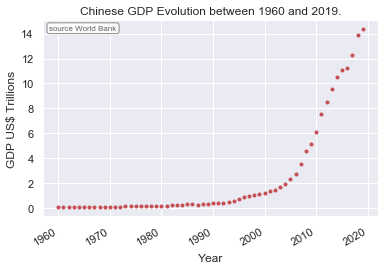

In [184]:
import matplotlib.ticker as ticker

x = pd.to_datetime(df['Year'])
y = df['Value']/10**12


fig, ax = plt.subplots()
ax.plot(x, y, 'ro', markersize=3)
ax.set_xlabel('Year',labelpad=6)
ax.set_ylabel('GDP US$ Trillions')
ax.set_title('Chinese GDP Evolution between 1960 and 2019.')
ax.ticklabel_format(style='plain',axis='y')
fig.autofmt_xdate()
plt.annotate('source World Bank', xy=(0.019, 0.95), xycoords='axes fraction' ,bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9), 
             size=8, alpha=0.7)
plt.savefig("img/nlr1.png", dpi=300)
plt.show()

## Choosing a model 

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

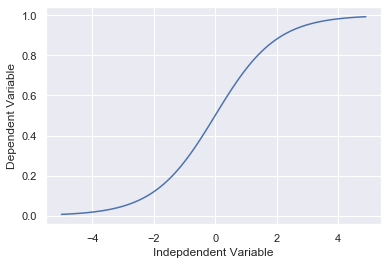

In [185]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Building The Model 
Now, let's build our regression model and initialize its parameters. 

In [186]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:

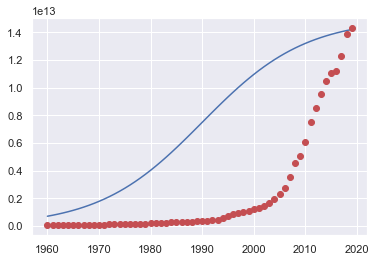

In [187]:
beta_1 = 0.10
beta_2 = 1990.0

x_data, y_data= pd.to_numeric(df['Year']),pd.to_numeric(df['Value'])

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [197]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

## How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [198]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 572.140495, beta_2 = 0.995854


Now we plot our resulting regression model.

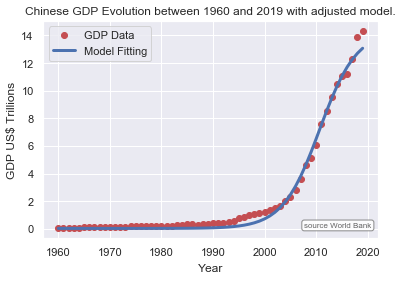

In [268]:
x = np.linspace(1960, 2020, 60, endpoint=False)
x = x/max(x)
y = sigmoid(x, *popt)

year_data=-0.0267607 + 2019.03*x
GDP_data=4.7209359006*10**10 + 1.42956934839103*10**13*y
year_pred=-0.0267607+2019.03*xdata
GDP_pred=4.7209359006*10**10 + 1.42956934839103*10**13*ydata

fig, ax=plt.subplots()
ax.plot(year_pred, GDP_pred/10**12,'ro', label='GDP Data')
ax.plot(year_data,GDP_data/10**12, linewidth=3.0, label='Model Fitting')
ax.set_xlabel('Year',labelpad=6)
ax.set_ylabel('GDP US$ Trillions')
ax.set_title('Chinese GDP Evolution between 1960 and 2019 with adjusted model.')
plt.legend()
plt.annotate('source World Bank', xy=(0.78, 0.05), xycoords='axes fraction' ,bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9), 
             size=8, alpha=0.7)
plt.savefig("img/nlr2.png", dpi=300)
plt.show()


## Accuracy of the model

In [201]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [202]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [203]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

In [204]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.98
